# Install required libraries

In [1]:
#!pip install nltk
#!pip install gensim
#!pip install pyLDAvis
#!pip install wordcloud
#!pip install matplotlib
#!pip install seaborn
#!pip install pandas
#!pip install datasets

In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
#multiprocessing.set_start_method('spawn')

# Load and Preprocess the Dataset
We'll use the Amazon reviews dataset, which is commonly used for topic modelling. It contains newsgroup posts on various topics.

In [3]:
import nltk
import pandas as pd
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the Amazon Reviews dataset
dataset = load_dataset("amazon_polarity", split='train[:5000]')  # Limiting to 5000 samples for faster processing

[nltk_data] Downloading package punkt to /home/nivedita/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nivedita/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nivedita/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
# Convert the dataset to a pandas DataFrame for easier handling
df = pd.DataFrame(dataset)
# Display the first few rows of the dataset
print(df.head(3))

   label                                  title  \
0      1         Stuning even for the non-gamer   
1      1  The best soundtrack ever to anything.   
2      1                               Amazing!   

                                             content  
0  This sound track was beautiful! It paints the ...  
1  I'm reading a lot of reviews saying that this ...  
2  This soundtrack is my favorite music of all ti...  


In [5]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)

In [6]:
# Apply preprocessing to the dataset
df['preprocessed_text'] = df['content'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(df[['content', 'preprocessed_text']].head(3))

                                             content  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   
2  This soundtrack is my favorite music of all ti...   

                                   preprocessed_text  
0  sound track beautiful paint senery mind well w...  
1  reading lot review saying best soundtrack figu...  
2  soundtrack favorite music time hand intense sa...  


# Exploratory Data Analysis (EDA) and Visualization

Visualize the Distribution of Sentiment Labels

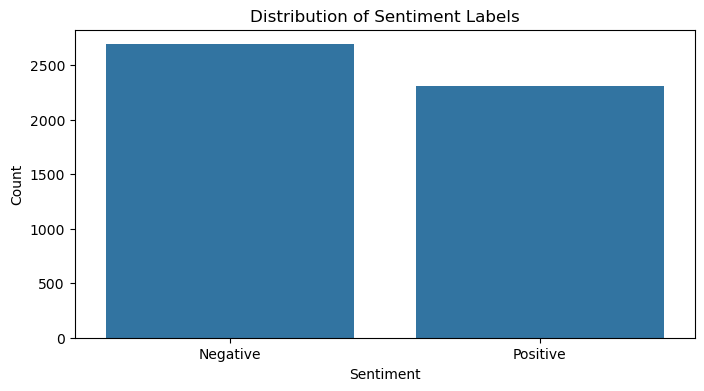

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of sentiment labels
plt.figure(figsize=(8, 4))
sns.countplot(x=df['label'])
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()


Visualize the Most Frequent Words

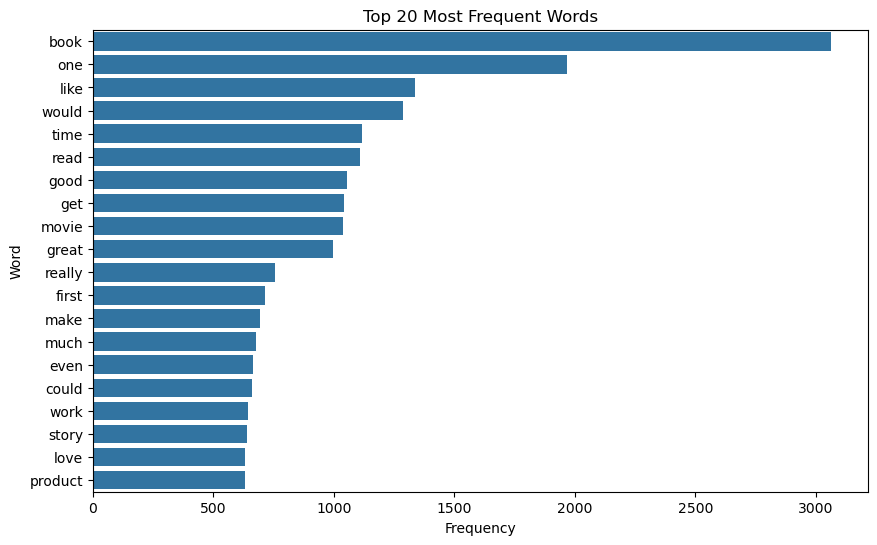

In [8]:
from collections import Counter

# Join all the preprocessed text
all_words = ' '.join(df['preprocessed_text']).split()
# Get the most common words
word_freq = Counter(all_words).most_common(20)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

# Plot the most frequent words
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Top 20 Most Frequent Words')
plt.show()


# Word Cloud Visualization

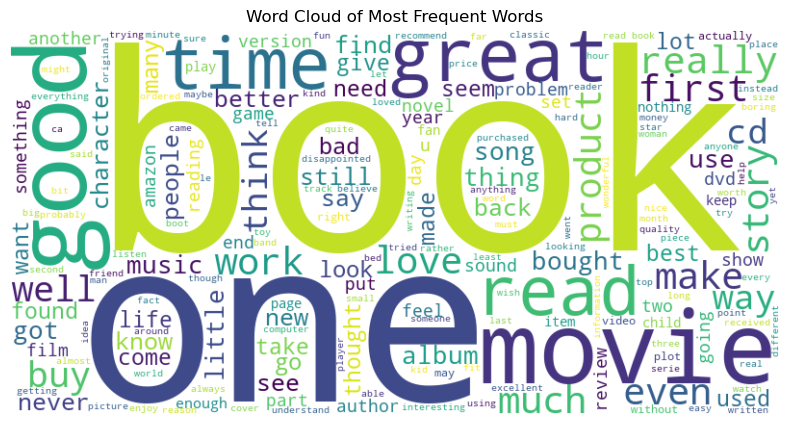

In [9]:
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

# Topic Modeling with LDA

# Data preparation

In [10]:
import gensim
from gensim import corpora

# Tokenize the preprocessed text for LDA
texts = [text.split() for text in df['preprocessed_text']]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)

# Create a corpus: List of bag-of-words vectors
corpus = [dictionary.doc2bow(text) for text in texts]

# Print an example of a document vector
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2)]


# Build the LDA Model

In [11]:
from gensim.models.ldamodel import LdaModel

# Set the number of topics
num_topics = 10

# Build the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, alpha='auto')

# Print the top words in each topic
for i, topic in lda_model.show_topics(formatted=False, num_words=10):
    print(f"Topic {i}: {[word for word, prob in topic]}")

Topic 0: ['movie', 'one', 'like', 'bad', 'film', 'good', 'dvd', 'watch', 'first', 'could']
Topic 1: ['toy', 'one', 'would', 'time', 'get', 'bought', 'work', 'even', 'size', 'son']
Topic 2: ['version', 'video', 'one', 'great', 'game', 'get', 'many', 'dance', 'like', 'time']
Topic 3: ['time', 'love', 'life', 'game', 'read', 'go', 'story', 'god', 'take', 'first']
Topic 4: ['bed', 'air', 'night', 'mattress', 'pump', 'sleep', 'comfortable', 'great', 'use', 'would']
Topic 5: ['dvd', 'christmas', 'great', 'cover', 'number', 'old', 'copy', 'love', 'puzzle', 'collection']
Topic 6: ['product', 'one', 'item', 'amazon', 'would', 'buy', 'month', 'get', 'time', 'work']
Topic 7: ['player', 'great', 'use', 'good', 'work', 'would', 'much', 'computer', 'like', 'unit']
Topic 8: ['book', 'read', 'one', 'story', 'character', 'would', 'like', 'reading', 'good', 'author']
Topic 9: ['song', 'cd', 'album', 'music', 'one', 'sound', 'like', 'track', 'best', 'great']


# Visualize the LDA Topics
Visualize with pyLDAvis

In [12]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the visualization
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)

/home/nivedita/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/site-packages/joblib/ext

In [13]:
# Display the visualization
pyLDAvis.display(lda_vis)


# Plot the Distribution of Topics in Documents

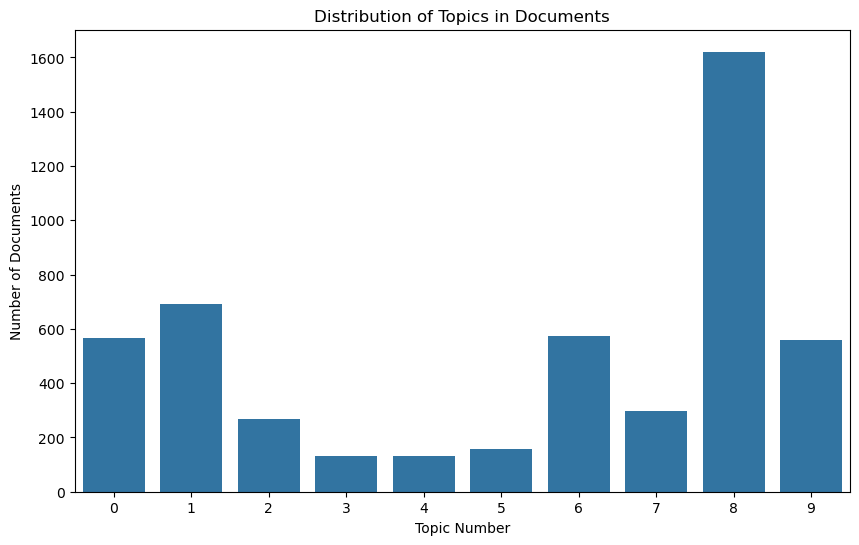

In [14]:
import numpy as np

# Assign the dominant topic to each document
def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
    sent_topics_df = []

    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df.append([i, int(topic_num), round(prop_topic, 4), topic_keywords])
            else:
                break
    return pd.DataFrame(sent_topics_df, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'])

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)

# Show the topic distribution
df_dominant_topic = df_topic_sents_keywords.groupby('Dominant_Topic').size().reset_index(name='Count')

# Plot the distribution of topics
plt.figure(figsize=(10, 6))
sns.barplot(x='Dominant_Topic', y='Count', data=df_dominant_topic)
plt.title('Distribution of Topics in Documents')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.show()


# Topic Coherence Score Visualization
The Topic Coherence score measures the interpretability of the topics generated by the LDA model. Higher coherence scores generally indicate better topic quality. You can visualize the coherence score for different numbers of topics to determine the optimal number.

In [15]:
from gensim.models.coherencemodel import CoherenceModel

# Compute the coherence score for each topic
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()

print(f'Coherence Score: {coherence_score:.4f}')

# Visualize the coherence score
topics_range = range(2, 15)
coherence_values = []

for num_topics in topics_range:
    model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=10, alpha='auto')
    coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherence_model.get_coherence())


/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork()

Coherence Score: 0.4885


/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork()

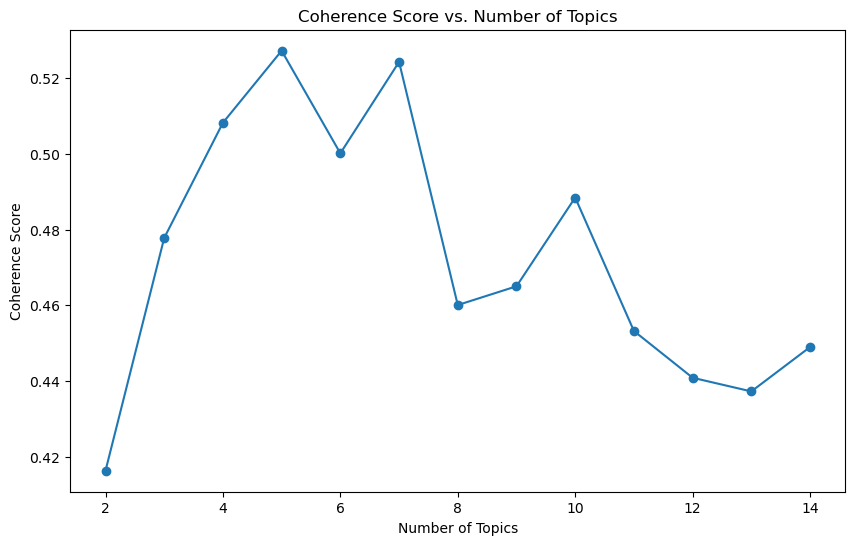

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(topics_range, coherence_values, marker='o')
plt.title('Coherence Score vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.show()

# Heatmap of Word Importance Across Topics
You can create a heatmap that shows how important each word is across different topics. This allows you to see which words are most strongly associated with specific topics.

In [17]:
import numpy as np

# Get the topic-word matrix
topic_word_weights = lda_model.get_topics()

In [18]:
# Print the shape of the matrix to understand its dimensions
print("Shape of topic_word_weights:", topic_word_weights.shape)

Shape of topic_word_weights: (10, 1751)


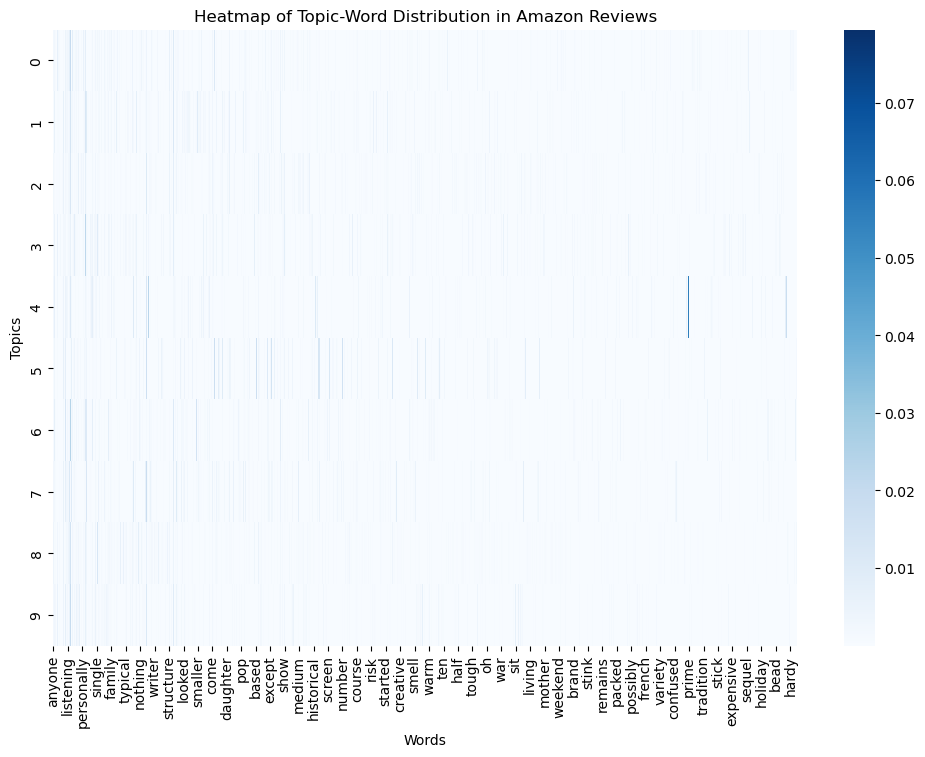

In [19]:
# Convert the matrix to a DataFrame for better visualization
topic_word_df = pd.DataFrame(topic_word_weights, columns=[dictionary[i] for i in range(len(dictionary))])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(topic_word_df, cmap='Blues', cbar=True)
# Add titles and labels
plt.title('Heatmap of Topic-Word Distribution in Amazon Reviews')
plt.xlabel('Words')
plt.ylabel('Topics')

# Show the plot
plt.show()

# Bigrams and Trigrams Visualization
Visualizing bigrams (two-word combinations) and trigrams (three-word combinations) can help in understanding the context in which certain words are used.

In [20]:
# Initialize the lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return tokens

# Apply preprocessing to the dataset
df['tokens'] = df['content'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(df[['content', 'tokens']].head())

                                             content  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   
2  This soundtrack is my favorite music of all ti...   
3  I truly like this soundtrack and I enjoy video...   
4  If you've played the game, you know how divine...   

                                              tokens  
0  [sound, track, beautiful, paint, senery, mind,...  
1  [reading, lot, review, saying, best, soundtrac...  
2  [soundtrack, favorite, music, time, hand, inte...  
3  [truly, like, soundtrack, enjoy, video, game, ...  
4  [played, game, know, divine, music, every, sin...  


# Generate Bigrams and Trigrams
Next, we'll generate bigrams (two-word combinations) and trigrams (three-word combinations) from the preprocessed tokens.



In [21]:
from nltk import ngrams
from collections import Counter

# Generate bigrams
bigrams = [bigram for tokens in df['tokens'] for bigram in ngrams(tokens, 2)]
bigram_freq = Counter(bigrams).most_common(20)

# Generate trigrams
trigrams = [trigram for tokens in df['tokens'] for trigram in ngrams(tokens, 3)]
trigram_freq = Counter(trigrams).most_common(20)


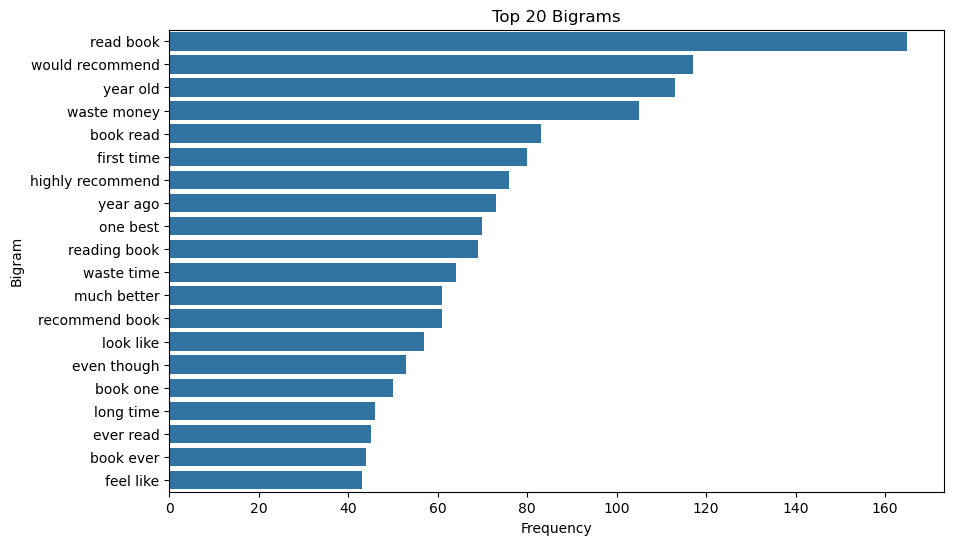

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare bigrams data for plotting
bigrams_df = pd.DataFrame(bigram_freq, columns=['Bigram', 'Frequency'])
bigrams_df['Bigram'] = bigrams_df['Bigram'].apply(lambda x: ' '.join(x))

# Plot the top 20 bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df)
plt.title('Top 20 Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

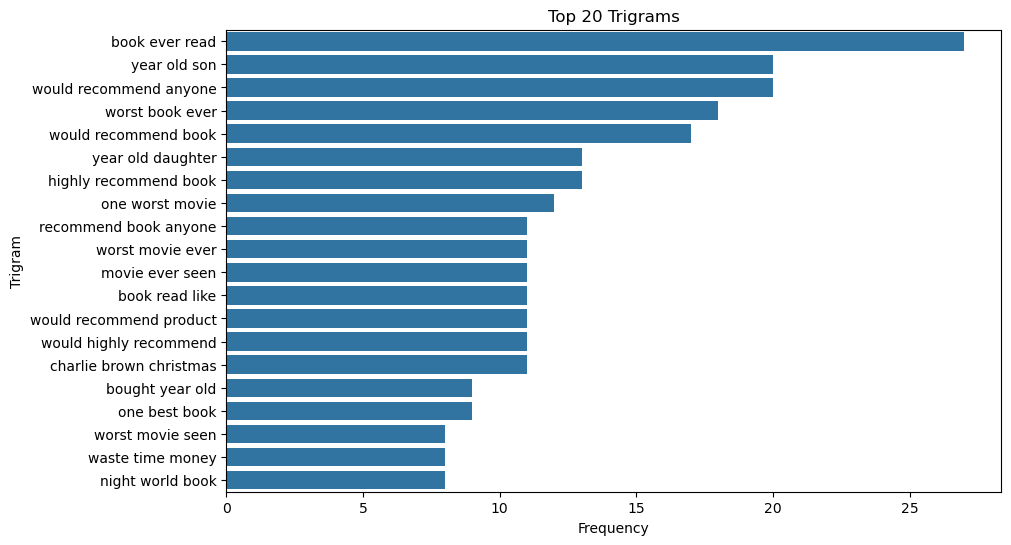

In [23]:
# Prepare trigrams data for plotting
trigrams_df = pd.DataFrame(trigram_freq, columns=['Trigram', 'Frequency'])
trigrams_df['Trigram'] = trigrams_df['Trigram'].apply(lambda x: ' '.join(x))

# Plot the top 20 trigrams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Trigram', data=trigrams_df)
plt.title('Top 20 Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

# Word Frequency Distribution Plot
While not unique to topic modeling, understanding the word frequency distribution can give insights into the overall corpus.

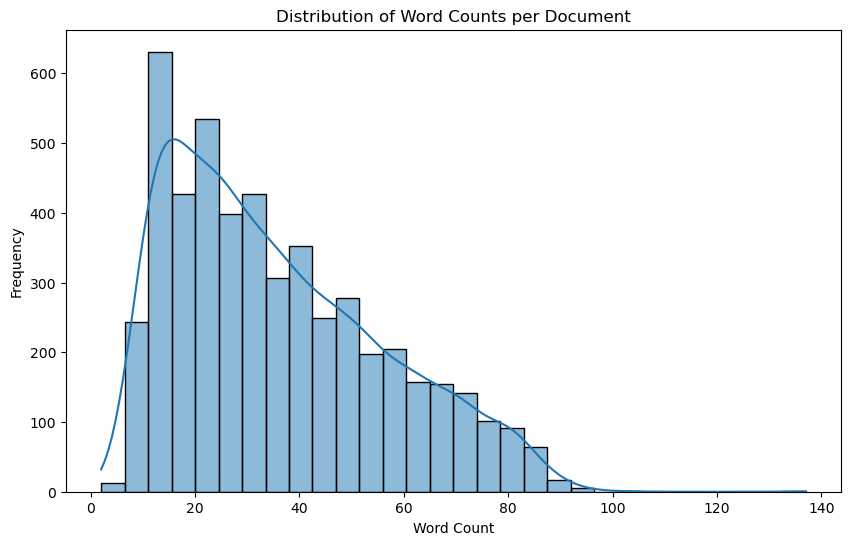

In [24]:
# Word Frequency Distribution
plt.figure(figsize=(10, 6))
sns.histplot([len(text.split()) for text in df['preprocessed_text']], bins=30, kde=True)
plt.title('Distribution of Word Counts per Document')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


# Top Words Per Topic Using Bar Charts
Visualize the top words for each topic using bar charts.

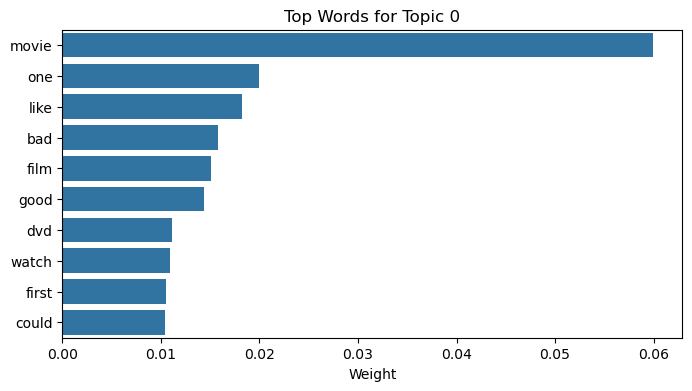

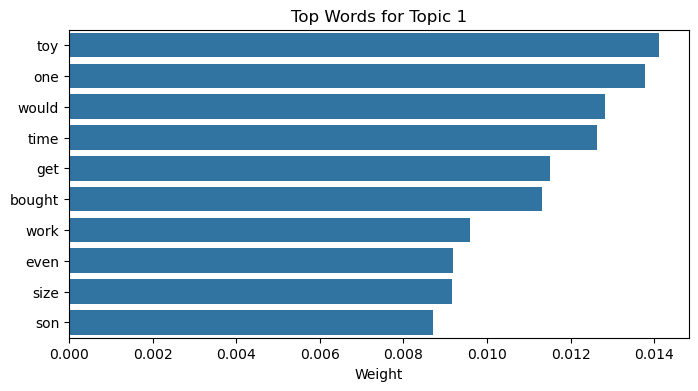

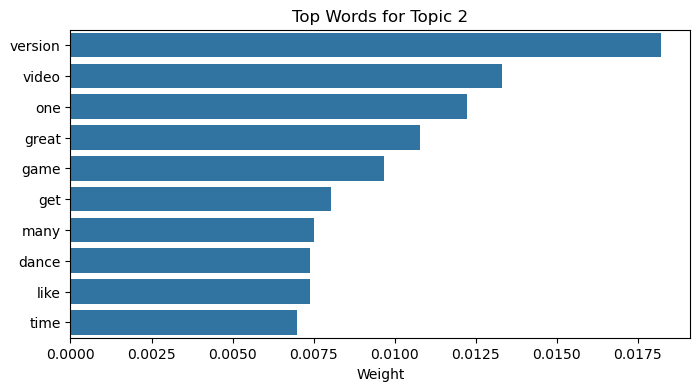

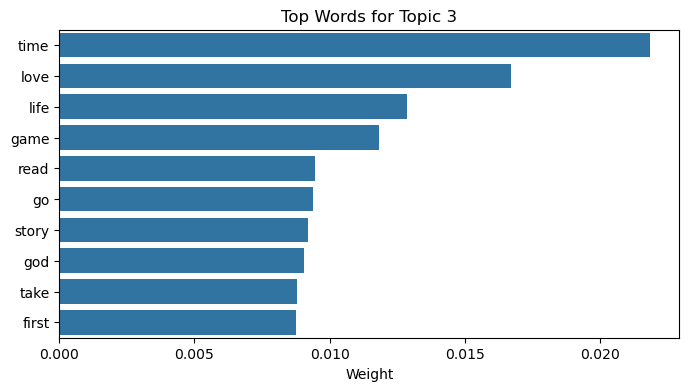

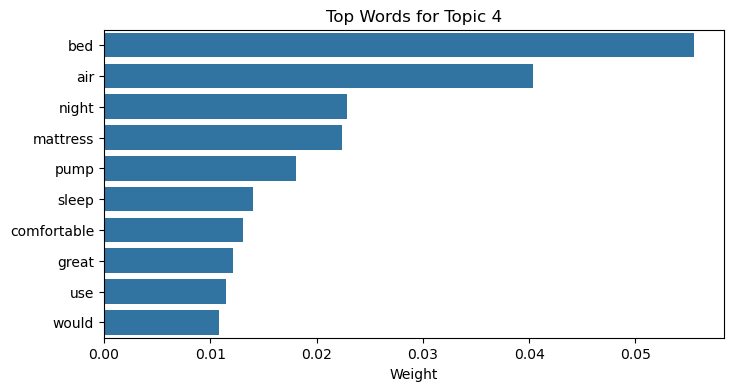

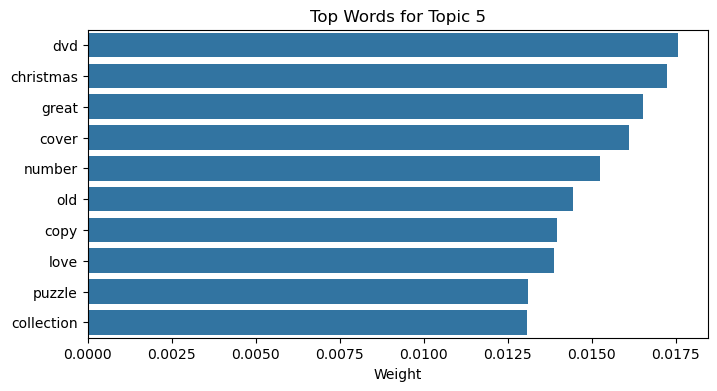

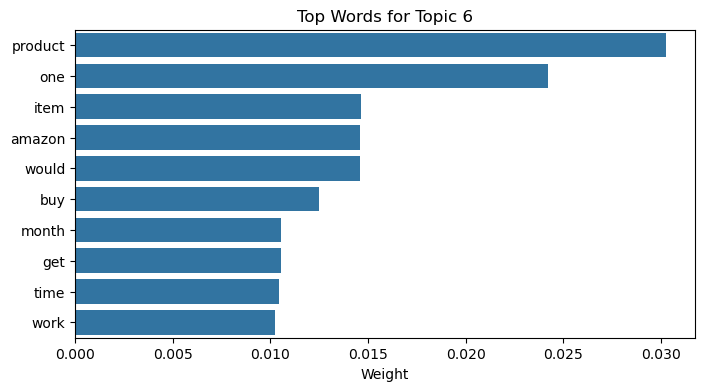

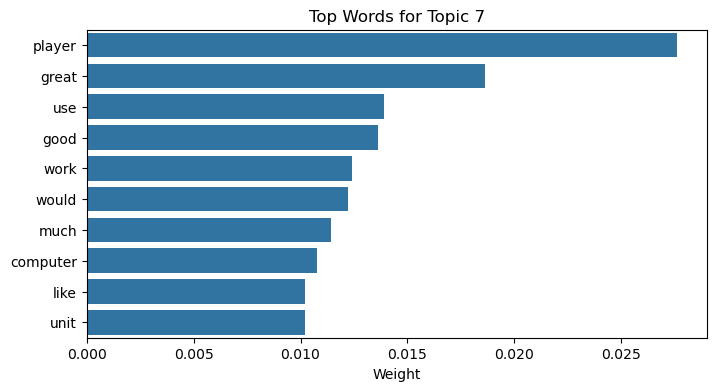

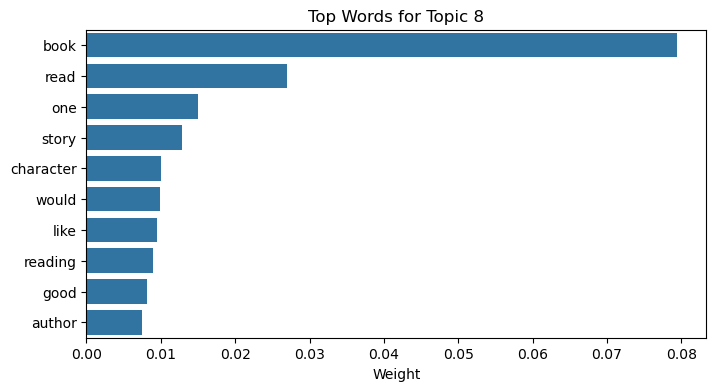

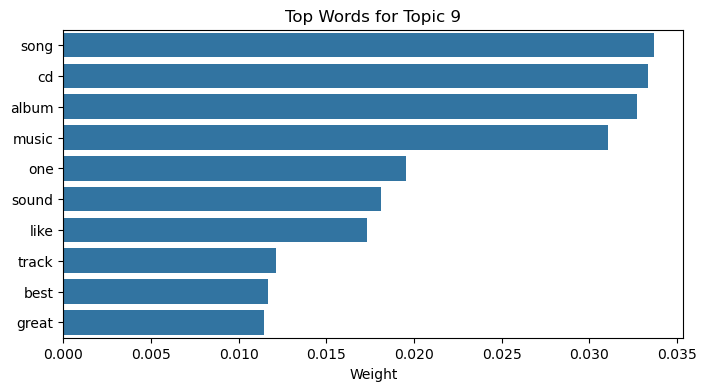

In [25]:
# Get the top words for each topic
for i, topic in lda_model.show_topics(formatted=False, num_words=10):
    words, weights = zip(*topic)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(weights), y=list(words))
    plt.title(f'Top Words for Topic {i}')
    plt.xlabel('Weight')
    plt.show()


# Dendrogram for Topic Hierarchy
A dendrogram can visualize hierarchical clustering of topics, showing how topics are related to one another.

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Get the topic-word matrix
topic_word_weights = lda_model.get_topics()

# Print shape of topic_word_weights
print("Shape of topic_word_weights:", topic_word_weights.shape)

# Use topic-word weights for clustering
linkage_matrix = linkage(topic_word_weights, method='ward')

Shape of topic_word_weights: (10, 1751)


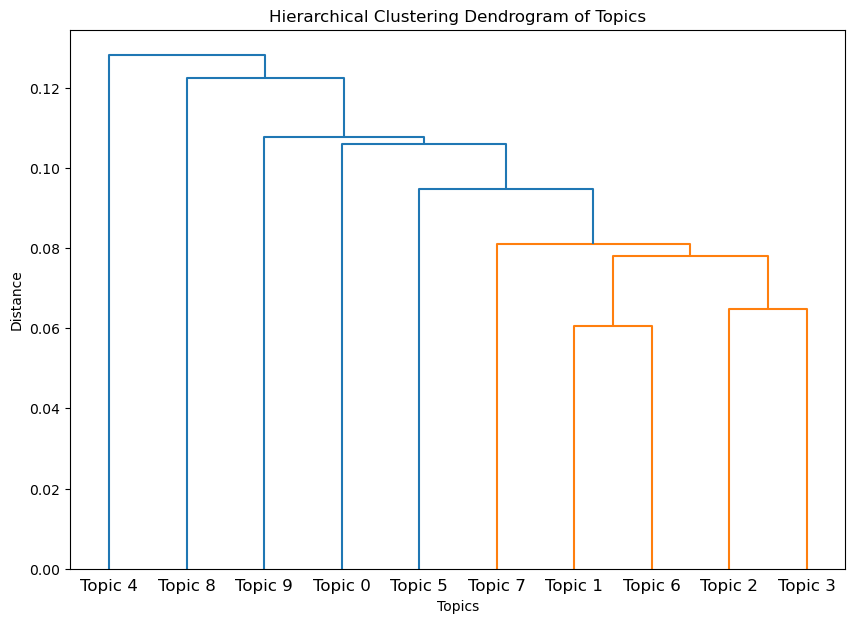

In [27]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=[f'Topic {i}' for i in range(topic_word_weights.shape[0])])
plt.title('Hierarchical Clustering Dendrogram of Topics')
plt.xlabel('Topics')
plt.ylabel('Distance')
plt.show()

# Topic Coherence Score Visualization
The topic coherence score is a measure of how interpretable the topics are. Higher coherence scores indicate that the topics are more understandable.

/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/home/nivedita/anaconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=296301) is multi-threaded, use of fork()

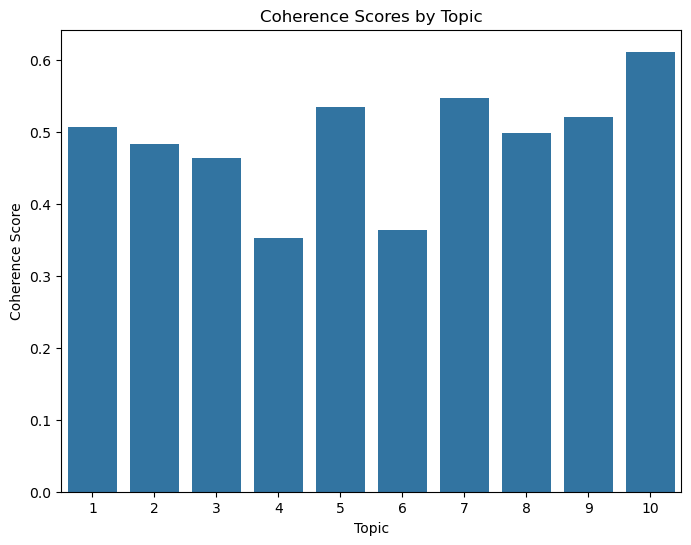

In [28]:
from gensim.models.coherencemodel import CoherenceModel

# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_scores = coherence_model_lda.get_coherence_per_topic()

# Plot coherence scores
plt.figure(figsize=(8, 6))
sns.barplot(x=list(range(1, len(coherence_scores) + 1)), y=coherence_scores)
plt.title('Coherence Scores by Topic')
plt.xlabel('Topic')
plt.ylabel('Coherence Score')
plt.show()


# t-SNE or UMAP for Topic Clustering
t-SNE (t-Distributed Stochastic Neighbor Embedding) and UMAP (Uniform Manifold Approximation and Projection) are dimensionality reduction techniques that can be used to visualize high-dimensional data, such as document-topic distributions, in 2D space.

In [29]:
# Function to preprocess the text
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)

# Apply preprocessing to the dataset
df['preprocessed_text'] = df['content'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(df[['content', 'preprocessed_text']].head(2))

                                             content  \
0  This sound track was beautiful! It paints the ...   
1  I'm reading a lot of reviews saying that this ...   

                                   preprocessed_text  
0  sound track beautiful paint senery mind well w...  
1  reading lot review saying best soundtrack figu...  


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)  # Limiting to 1000 features for simplicity
X = vectorizer.fit_transform(df['preprocessed_text']).toarray()
# Extract labels
y = df['label']

In [31]:
import umap
# Initialize UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
# Fit and transform the data
X_umap = umap_model.fit_transform(X)

2024-08-13 10:50:51.062504: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 10:50:51.216212: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 10:50:51.296489: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 10:50:51.315730: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 10:50:51.444745: I tensorflow/core/platform/cpu_feature_guar

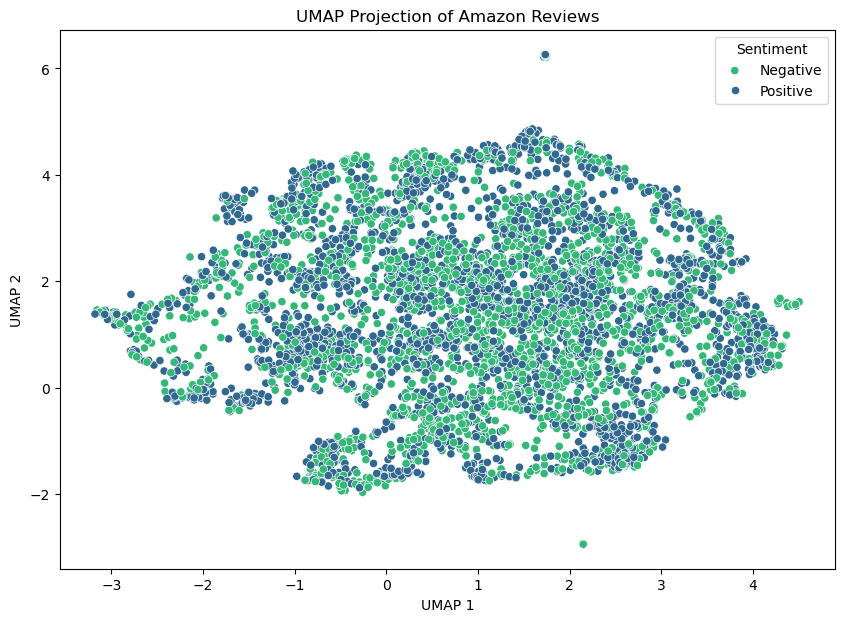

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y, palette='viridis', legend='full')
plt.title('UMAP Projection of Amazon Reviews')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Sentiment', labels=['Negative', 'Positive'])
plt.show()


/tmp/ipykernel_296301/3267639750.py:15: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.scatterplot(


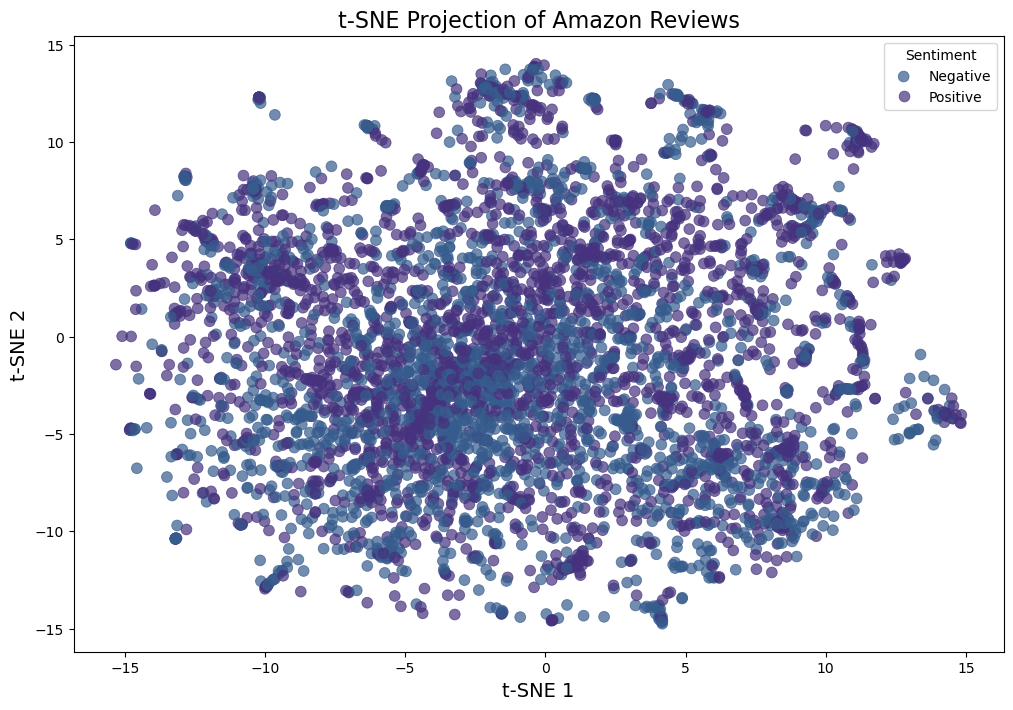

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Optimize t-SNE parameters
tsne_model = TSNE(n_components=2, random_state=42, perplexity=40, learning_rate=200, n_iter=1000)
# Fit and transform the data
X_tsne = tsne_model.fit_transform(X)

# Improved t-SNE plot
plt.figure(figsize=(12, 8))
# Use a refined color palette
palette = sns.color_palette("viridis")
# Plot with enhanced aesthetics
sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=palette, legend='full',
    alpha=0.7, edgecolor=None, s=60
)
# Adding titles and labels
plt.title('t-SNE Projection of Amazon Reviews', fontsize=16)
plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
# Customize legend
plt.legend(title='Sentiment', labels=['Negative', 'Positive'], loc='best')
# Display the plot
plt.show()

# Correlation Matrix of Topics
A correlation matrix can show how topics are correlated with one another, revealing any dependencies between topics.

In [34]:
#import numpy as np

#topic_word_weights = lda_model.get_topics()
# Compute correlation matrix
#corr_matrix = np.corrcoef(topic_word_weights.T)

# Plot the correlation matrix
#plt.figure(figsize=(10, 8))
#sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', xticklabels=[f'Topic {i}' for i in range(num_topics)], yticklabels=[f'Topic {i}' for i in range(num_topics)])
#plt.title('Correlation Matrix of Topics')
#plt.show()

In [35]:
#topic_word_weights